# Deep Learning Course

## Assignment 2

### Assignment Goals

* Design and implementation of CNNs.
* CNN visualization.
* Implementation of ResNet.

In this assignment, you will be asked to learn CNN models for an image dataset. Different experiments will help you achieve a better understanding of CNNs.

### Dataset

The dataset consists of around 9K images (some grayscale and some RGB) belonging to 101 classes. The shape of each image is (64,64,3). Every image is labeled with one of the classes. The image file is contained in the folder named after the class name.


### Requirements

1. **(40 points) Implement and improve a CNN model.**

   (a) We are aiming to learn a CNN on the given dataset. Download the dataset, and use Keras 2 to implement LeNet5 to classify instances. Use a one-hot encoding for labels. Split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both training and validation sets. (20 points)
   
    The LeNet5 configuration is:
      - Convolutional layer (kernel size 5 x 5, 32 filters, stride 1 x 1 and followed by ReLU)
      - Max Pooling layer with size 4 and stride 4 x 4 
      - Convolutional layer (kernel size 5 x 5, 64 filters, stride 1 x 1 and followed by ReLU)
      - Max Pooling layer with size 4 and stride 4 x 4
      - Fully Connected ReLU layer that has 1021 neurons
      - Fully Connected ReLU layer with 84 neurons
      - Fully Connected Softmax layer that has input 84 and output which is equal to the number of classes (one node for each of the classes).

   (b) Try to improve model accuracy on the validation dataset by tuning the model hyperparameters. You can use any improvement methods you prefer. You are expected to reach at least 65 percent accuracy on validation set. (20 points)
    
    Here are some improvement methods you can use, of course you can use others which are not mentioned here:
    - Dropout
    - L1, L2 regularization
    - Try improved initialization (e.g., Xavier initialier)
    - Batch Normalization
    
   The grading of part (b) is based on the correctness of your implementation (5 points) and the performance of your improvement on the validation set. The validation accuracy and corresponding score is:
    - 65% (5 points)
    - 67% (8 points)
    - 69% (12 points)
    - 71% (15 points)


   **Structure of LENET-5**
   
   This following LENET-5 structure is for 10-class dataset. Therefore, the layer size is not exactly the same as ours. 
   
   ![hw2_lenet5.png](hw2_lenet5.png)

2. **(20 points) Visualize layer activation**

    There are several approaches to understand and visualize convolutional Networks, including visualizing the activations and layers weights. The most straight-forward visualization technique is to show the activations of the network during the forward pass. The second most common strategy is to visualize the weights. For more information we recommend the course notes on ["Visualizing what ConvNets learn"](http://cs231n.github.io/understanding-cnn/). More advanced techniques can be found in "Visualizing and Understanding Convolutional Networks" paper by Matthew D.Zeiler and Rob Fergus.
    
    Please visualize the layer activation of **the first conv layer** and **the second conv layer** of your above CNN model (after completing Q1), on the following 2 images:
    - accordion/image_0001
    - camera/image_0001
    
   Visualizing a CNN layer activation means to visualize the result of the activation layer as an image. Specifically, the activation of the first conv layer is the output of the first (conv + ReLU) layer during forward propagation. Since we have 32 filters in the first conv layer, you should draw 32 activation images for the first conv layer. Please display multiple images side by side in a row to make your output more readable (Hint: matplotlib.pyplot.subplot).
    
    

3. **(40 points) ResNet Implementation**

    Use Keras 2 to implement ResNet 18 to classify the given dataset. Same as above, please use a one-hot encoding for labels, split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both training and validation sets. See the paper [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) for detailed introduction of ResNet. 
    
    The grading of this part is mainly based on the implementation and performance on validation set. If you need more resources to complete the training, consider using Google Colab.
    
    The ResNet 18 configuration is:
    -  conv_1 (kernel size 7 x 7, 64 filters, stride 2 x 2)
    -  conv_2 (max pooling layer with size 3 x 3, followed by 2 blocks.Each block contains two conv layers. Each conv layer has kernel size 3 x 3, 64 filters, stride 2 x 2)
    -  conv_3 (2 blocks, each contains 2 conv layers with kernel size 3*3, 128 filters)
    -  conv_4 (2 blocks, each contains 2 conv layers with kernel size 3*3, 256 filters)
    -  conv_5 (2 blocks, each contains 2 conv layers with kernel size 3*3, 512 filters)
    
   A block has the structure:
   
    ![hw2_resnet.png](hw2_resnet.png) 
    <!--<img src="attachment:image.png" alt="drawing" width="400"/>-->

### Submission Notes

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in (.pdf or .html) and .ipynb format. (penalty 10 points)

## Your Implementation

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential

import tensorflow
tensorflow.random.set_seed(0)
np.random.seed(0)

# use GPU
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Dataset preprocessing

Found 8678 files belonging to 101 classes.
Using 7811 files for training.
Found 8678 files belonging to 101 classes.
Using 867 files for validation.


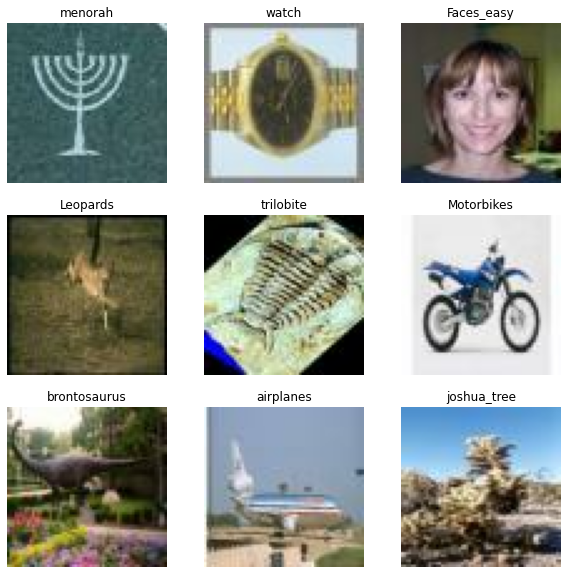

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.python.keras.utils.data_utils import Sequence
from tensorflow.keras import layers
import os
import os.path
from PIL import Image
import matplotlib.pyplot as plt

# dataset_dir = '101_ObjectCategories_resized/'
dataset_dir = '/content/gdrive/MyDrive/101_ObjectCategories_resized/'
num_classes= 101
batch_size = 64
image_size = (64, 64)

labels_name = sorted(os.listdir(dataset_dir))# [1:]
labels_dict = {k: v for v, k in enumerate(labels_name)} # {'Faces': 0, ...}
labels_dict_reverse = {v: k for v, k in enumerate(labels_name)} # {0: 'Faces', ...}

# labels_index = np.arange(len(labels_name))
# labels_one_hot = to_categorical(labels_index)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=image_size,
    shuffle=True, seed=1234, validation_split=0.1, subset='training',
    interpolation='bilinear', follow_links=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=image_size,
    shuffle=True, seed=1234, validation_split=0.1, subset='validation',
    interpolation='bilinear', follow_links=False
)

# visualize dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_label = labels[i].numpy()
        class_label = np.argmax(class_label, axis=0)
        class_label_name = labels_dict_reverse[class_label]
        plt.title(class_label_name)
        plt.axis("off")
        

#split dataset to train(90%) and validation(10%) set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### ResNet Implementation

In [ ]:
# implement a ResNet model here

num_classes = 101
image_size = (64, 64)

batch_size = 64
epochs = 200

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    
    # conv_1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    # conv_2
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same")(x)

    x_shortcut = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256, 512]:

        # Block 1
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(2, 2), padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)
 
        # in order to match the changed dimension
        x_shortcut = layers.Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
        x = layers.add([x, x_shortcut])
       
        x = layers.Activation("relu")(x)
        x_shortcut = x  
        
        # Block 2
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.add([x, x_shortcut])  
        x = layers.Activation("relu")(x)
        x_shortcut = x

        
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
ResNet18 = get_model(image_size, num_classes)

ResNet18.summary()

sgd = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
adam = keras.optimizers.Adam(1e-3)

ResNet18.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
value_epoches3 = ResNet18.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds)

print("_________________________________________________________________")
score = ResNet18.evaluate(train_ds, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])
      
score = ResNet18.evaluate(val_ds, verbose=0)
print("val loss:", score[0])
print("val accuracy:", score[1])



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________